In [1]:
#Load Basic libraries
import numpy as np
import pandas as pd
import os
import cv2
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy
from scipy.stats import zscore


In [5]:
#Load Dataset
PATH = r'C:\Users\Pedro Vallarino\Desktop\Scripts\Python\Vision Artificial\Reconocer Formas\shapes'
shapes = ['circle', 'square','triangle', 'star']
labels = []
dataset = []

for shape in shapes:
    print('Getting Data for :', shape)
    for img in os.listdir(os.path.join(PATH, shape)):
        grayImage = cv2.imread(os.path.join(PATH,shape,img), cv2.IMREAD_GRAYSCALE)
#         (thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 125, 255, cv2.THRESH_BINARY)
        ret, thresh = cv2.threshold(grayImage, 127, 255, 0)
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
#         contours, hierarchy = cv2.findContours(blackAndWhiteImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        
        
        #Calculate Moments
        moments = cv2.moments(contours[1])
        
        # Calculate Hu Moments
        huMoments = cv2.HuMoments(moments)
        
        # Log scale hu moments
        try:
        # Log scale hu moments
            for i in range(0,7):
                huMoments[i] = -1* math.copysign(1.0, huMoments[i]) * math.log10(abs(huMoments[i]))
        except Exception:
            pass
        
        huMoments = abs(huMoments)
        
        dataset.append(huMoments)
        
        #Add Label list
        labels.append(shapes.index(shape))

for i in range(0,len(dataset)):
    dataset[i] = pd.DataFrame(dataset[i])
    dataset[i] = pd.DataFrame.transpose(dataset[i])

result = pd.concat(dataset)

pd.DataFrame.head(result)
result = result.reset_index()
pd.DataFrame.head(result)

result = result.drop(columns='index')
pd.DataFrame.head(result)
labels = pd.DataFrame(labels)
pd.DataFrame.head(labels)

result.insert(7,"labels",labels)
result.columns = ['Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','Hu7','labels']

print('\n','Dataset Total')
display(pd.DataFrame.head(result))

Hu_CIRCLE = result.iloc[:,:][result['labels'] == 0]
pd.DataFrame.head(Hu_CIRCLE)
Hu_SQUARE = result.iloc[:,:][result['labels'] == 1]
pd.DataFrame.head(Hu_SQUARE)
Hu_TRIANGLE = result.iloc[:,:][result['labels'] == 2]
pd.DataFrame.head(Hu_TRIANGLE)
Hu_STAR = result.iloc[:,:][result['labels'] == 3]
print('\n','Dataset de Estrella')
display(pd.DataFrame.head(Hu_STAR))

Getting Data for : circle
Getting Data for : square
Getting Data for : triangle
Getting Data for : star

 Dataset Total


,Hu1,Hu2,Hu3,Hu4,Hu5,Hu6,Hu7,labels
0,0.797857,4.879789,7.530516,10.244175,20.079898,12.795658,19.134292,0
1,0.797870,4.853469,7.262589,10.286674,19.094686,12.734314,19.484420,0
2,0.797864,4.838065,6.629907,9.955211,18.413754,12.505186,18.383844,0
3,0.797900,5.087738,6.222049,10.012370,18.860020,12.556728,18.137227,0
4,0.768365,2.652744,3.640266,5.042419,9.383762,6.368791,16.823490,0



 Dataset de Estrella


,Hu1,Hu2,Hu3,Hu4,Hu5,Hu6,Hu7,labels
11205,0.676064,3.880643,4.961546,7.111936,13.282769,9.774739,13.316958,3
11206,0.676000,3.908177,5.168713,6.192217,11.885404,8.159521,12.495107,3
11207,0.676666,4.020828,5.265204,6.330929,12.167410,8.354993,12.524050,3
11208,0.677457,4.049135,4.613582,6.260687,11.808890,8.946007,11.896574,3
11209,0.748359,2.205896,22.017078,22.357470,44.563285,23.613732,45.088272,3


In [6]:
# new_DF = [0,0,0,0,0,0,0]
# Hu_CIRCLE_Y = [0,0,0,0,0,0,0]
# F_E = [0,0,0,0,0,0,0] 

# for ID in range(0,7):

#     Hu_CIRCLE_X = Hu_CIRCLE.iloc[:,ID]
#     Hu_CIRCLE_Y[ID] = Hu_CIRCLE_X 
#     num_bins = 100
#     n, bins, patches = plt.hist(Hu_CIRCLE_X, num_bins, facecolor='blue', alpha=0.5)
#     plt.show()
    
#     z_scores = scipy.stats.zscore(Hu_CIRCLE_X)
#     abs_z_scores = np.abs(z_scores)
#     filtered_entries = (abs_z_scores < 1.5)
#     new_df = Hu_CIRCLE_X[filtered_entries]
#     F_E[ID] = filtered_entries
#     new_DF[ID] = new_df
#     num_bins = 100
#     n, bins, patches = plt.hist(new_df, num_bins, facecolor='blue', alpha=0.5)
#     plt.show()
    
    
# ORIGINAL =[len(Hu_CIRCLE_Y[0]),len(Hu_CIRCLE_Y[1]),len(Hu_CIRCLE_Y[2]),len(Hu_CIRCLE_Y[3]),len(Hu_CIRCLE_Y[4]),len(Hu_CIRCLE_Y[5]),len(Hu_CIRCLE_Y[6])]
# OUTLIERS=[len(new_DF[0]),len(new_DF[1]),len(new_DF[2]),len(new_DF[3]),len(new_DF[4]),len(new_DF[5]),len(new_DF[6])]
# DIF = np.subtract(ORIGINAL,OUTLIERS)
# print(DIF)
# import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# langs = ['Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','Hu7']
# ax.bar(langs,DIF)
# plt.show()

# #Al ver los graficos anteriores  se ve claramente que el unico que causa outliers en el circulo es el momento de Hu1
# Hu_CIRCLE_Q = pd.DataFrame.transpose(Hu_CIRCLE)
# Hu_CIRCLE_Q.reset_index(level=0, inplace=True)
# display(Hu_CIRCLE_Q)

# # EjeX_Hu = np.arange(8) + 1
# EjeX_Hu = ['Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','Hu7','label']
# EjeX_Hu = np.asarray(EjeX_Hu)

# for k in range(1,len(Hu_CIRCLE_Q.columns.values)-1):    
#     EjeY_Hu = np.asarray(Hu_CIRCLE_Q.iloc[:,k])
#     plt.plot(EjeX_Hu,EjeY_Hu,'r-')

# plt.show()

In [7]:
# new_DF = [0,0,0,0,0,0,0]
# Hu_SQUARE_Y = [0,0,0,0,0,0,0]
# F_E = [0,0,0,0,0,0,0] 

# for ID in range(0,7):

#     Hu_SQUARE_X = Hu_SQUARE.iloc[:,ID]
#     Hu_SQUARE_Y[ID] = Hu_SQUARE_X 
    
#     num_bins = 100
#     n, bins, patches = plt.hist(Hu_SQUARE_X, num_bins, facecolor='blue', alpha=0.5)
#     plt.show()
    
#     z_scores = scipy.stats.zscore(Hu_SQUARE_X)
#     abs_z_scores = np.abs(z_scores)
#     filtered_entries = (abs_z_scores < 1.5)
#     new_df = Hu_SQUARE_X[filtered_entries]
#     F_E[ID] = filtered_entries
#     new_DF[ID] = new_df
    
#     num_bins = 100
#     n, bins, patches = plt.hist(new_df, num_bins, facecolor='blue', alpha=0.5)
#     plt.show()

# ORIGINAL =[len(Hu_SQUARE_Y[0]),len(Hu_SQUARE_Y[1]),len(Hu_SQUARE_Y[2]),len(Hu_SQUARE_Y[3]),len(Hu_SQUARE_Y[4]),len(Hu_SQUARE_Y[5]),len(Hu_SQUARE_Y[6])]
# OUTLIERS=[len(new_DF[0]),len(new_DF[1]),len(new_DF[2]),len(new_DF[3]),len(new_DF[4]),len(new_DF[5]),len(new_DF[6])]
# DIF = np.subtract(ORIGINAL,OUTLIERS)

# print(DIF)

# import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# langs = ['Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','Hu7']
# ax.bar(langs,DIF)
# plt.show()

# #Al ver los graficos anteriores  se ve claramente que el unico que causa outliers en el circulo es el momento de Hu1
# Hu_SQUARE_Q = pd.DataFrame.transpose(Hu_SQUARE)
# Hu_SQUARE_Q.reset_index(level=0, inplace=True)
# display(Hu_SQUARE_Q)

# EjeX_Hu = ['Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','Hu7','label']
# EjeX_Hu = np.asarray(EjeX_Hu)

# for k in range(1,len(Hu_SQUARE_Q.columns.values)-1):    
#     EjeY_Hu = np.asarray(Hu_SQUARE_Q.iloc[:,k])
#     plt.plot(EjeX_Hu,EjeY_Hu,'b-')

# plt.show()


In [8]:
# new_DF = [0,0,0,0,0,0,0]
# Hu_TRIANGLE_Y = [0,0,0,0,0,0,0]
# F_E = [0,0,0,0,0,0,0] 

# for ID in range(0,7):

#     Hu_TRIANGLE_X = Hu_TRIANGLE.iloc[:,ID]
#     Hu_TRIANGLE_Y[ID] = Hu_TRIANGLE_X 
    
#     num_bins = 100
#     n, bins, patches = plt.hist(Hu_TRIANGLE_X, num_bins, facecolor='blue', alpha=0.5)
#     plt.show()
    
#     z_scores = scipy.stats.zscore(Hu_TRIANGLE_X)
#     abs_z_scores = np.abs(z_scores)
#     filtered_entries = (abs_z_scores < 1.5)
#     new_df = Hu_TRIANGLE_X[filtered_entries]
#     F_E[ID] = filtered_entries
#     new_DF[ID] = new_df
    
#     num_bins = 100
#     n, bins, patches = plt.hist(new_df, num_bins, facecolor='blue', alpha=0.5)
#     plt.show()

# ORIGINAL =[len(Hu_TRIANGLE_Y[0]),len(Hu_TRIANGLE_Y[1]),len(Hu_TRIANGLE_Y[2]),len(Hu_TRIANGLE_Y[3]),len(Hu_TRIANGLE_Y[4]),len(Hu_TRIANGLE_Y[5]),len(Hu_TRIANGLE_Y[6])]
# OUTLIERS=[len(new_DF[0]),len(new_DF[1]),len(new_DF[2]),len(new_DF[3]),len(new_DF[4]),len(new_DF[5]),len(new_DF[6])]
# DIF = np.subtract(ORIGINAL,OUTLIERS)
# print(DIF)
# import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# langs = ['Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','Hu7']
# ax.bar(langs,DIF)
# plt.show()


# #Al ver los graficos anteriores  se ve claramente que el unico que causa outliers en el circulo es el momento de Hu1
# Hu_TRIANGLE_Q = pd.DataFrame.transpose(Hu_TRIANGLE)
# Hu_TRIANGLE_Q.reset_index(level=0, inplace=True)
# display(Hu_TRIANGLE_Q)

# EjeX_Hu = ['Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','Hu7','label']
# EjeX_Hu = np.asarray(EjeX_Hu)

# for k in range(1,len(Hu_TRIANGLE_Q.columns.values)-1):    
#     EjeY_Hu = np.asarray(Hu_TRIANGLE_Q.iloc[:,k])
#     plt.plot(EjeX_Hu,EjeY_Hu,'g-')

# plt.show()


In [9]:
# F_E = [0,0,0,0,0,0,0] 
# new_DF = [0,0,0,0,0,0,0]
# Hu_STAR_Y = [0,0,0,0,0,0,0]

# for ID in range(0,7):

#     Hu_STAR_X = Hu_STAR.iloc[:,ID]
#     Hu_STAR_Y[ID] = Hu_STAR_X 
    
#     num_bins = 100
#     n, bins, patches = plt.hist(Hu_STAR_X, num_bins, facecolor='blue', alpha=0.5)
#     plt.show()
    
#     z_scores = scipy.stats.zscore(Hu_STAR_X)
#     abs_z_scores = np.abs(z_scores)
#     filtered_entries = (abs_z_scores < 1.5)
#     new_df = Hu_STAR_X[filtered_entries]
#     F_E[ID] = filtered_entries
#     new_DF[ID] = new_df
    
#     num_bins = 100
#     n, bins, patches = plt.hist(new_df, num_bins, facecolor='blue', alpha=0.5)
#     plt.show()

# ORIGINAL =[len(Hu_STAR_Y[0]),len(Hu_STAR_Y[1]),len(Hu_STAR_Y[2]),len(Hu_STAR_Y[3]),len(Hu_STAR_Y[4]),len(Hu_STAR_Y[5]),len(Hu_STAR_Y[6])]
# OUTLIERS=[len(new_DF[0]),len(new_DF[1]),len(new_DF[2]),len(new_DF[3]),len(new_DF[4]),len(new_DF[5]),len(new_DF[6])]
# DIF = np.subtract(ORIGINAL,OUTLIERS)
# print(DIF)
# import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# langs = ['Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','Hu7']
# ax.bar(langs,DIF)
# plt.show()


# #Al ver los graficos anteriores  se ve claramente que el unico que causa outliers en el circulo es el momento de Hu1
# Hu_STAR_Q = pd.DataFrame.transpose(Hu_STAR)
# Hu_STAR_Q.reset_index(level=0, inplace=True)
# display(Hu_STAR_Q)

# EjeX_Hu = ['Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','Hu7','label']
# EjeX_Hu = np.asarray(EjeX_Hu)

# for k in range(1,len(Hu_STAR_Q.columns.values)-1):    
#     EjeY_Hu = np.asarray(Hu_STAR_Q.iloc[:,k])
#     plt.plot(EjeX_Hu,EjeY_Hu,'y-')

# plt.show()


In [10]:
# print(F_E)
# F_E2 = [0,0,0,0,0,0,0]


# for x in range(0,7):
    
#     F_E2[x] = F_E[x].astype('uint8')

# F_E2 = pd.DataFrame(F_E2)

# Suma = np.zeros(len(F_E2.columns.values))

# for q in range(0,len(F_E2.columns.values)):
#     Suma[q] = sum(F_E2[q])

# Suma = pd.DataFrame(Suma)
# Suma = Suma.T
# F_E3 = F_E2
# F_E3 = F_E3.append(Suma,ignore_index = True)
# display(F_E3)

# arr2 = F_E3.iloc[7,:]
# import collections

# collections.Counter(arr2)

# F_E4 = F_E3.T
# F_E4.columns = ['Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','Hu7','Suma']
# F_E5 = F_E4[(F_E4.Suma >=5)]
# F_E6 = F_E5.T
# display(F_E6)

# print(len(arr2))
# arr2 = F_E6.iloc[7,:]
# collections.Counter(arr2)


In [11]:
# F_E6 = pd.DataFrame(F_E6)
# display(F_E6)

In [12]:
# result.isnull().sum() #Porque es imposible no tener datos de una imagen, la imagen en si ya son datos

In [13]:
data = result[['Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','Hu7']]
lbl = result[['labels']]

#Train Test Split
from sklearn.model_selection import train_test_split

#Split train and test set
x_train, x_test, y_train, y_test = train_test_split(data,lbl , test_size = 0.3, random_state = 7)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

10479
4491
10479
4491


# Modelos de Prediccion

### Logistic Regression

C:\Users\Pedro Vallarino\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pedro Vallarino\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pedro Vallarino\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression: 
               precision    recall  f1-score   support

           0       0.67      0.59      0.63      1260
           1       0.40      0.47      0.44       974
           2       0.68      0.84      0.75       898
           3       0.66      0.55      0.60      1359

    accuracy                           0.60      4491
   macro avg       0.61      0.62      0.61      4491
weighted avg       0.61      0.60      0.60      4491

Logistic Regression Accuracy:  0.6043197506123358


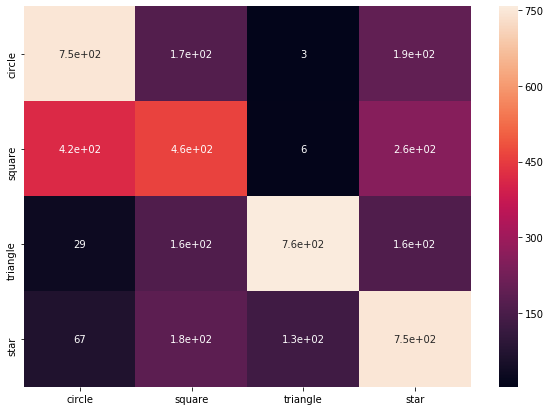

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.metrics import confusion_matrix
import seaborn as sn

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

predictLR = modelLR.predict(x_test)
print('Logistic Regression: \n', classification_report(predictLR, y_test))
print('Logistic Regression Accuracy: ', accuracy_score(predictLR, y_test))

#precision : Basicamente la precision del modelo
#recall    : Cantidad de predicciones correctas sobre el total que tenia realmente ese valor
#f1-score  : Sirve para diferenciar los falsos positivos de los negativos
#support   : ---

#confusion matrix, en el eje x van los reales y en el eje y los que predice el algoritmo
conf_matrix = confusion_matrix(y_test, predictLR)
conf_matrix = pd.DataFrame(conf_matrix,index = ['circle','square','triangle','star'])
conf_matrix.columns = ['circle','square','triangle','star']
plt.figure(figsize = (10,7))
sn.heatmap(conf_matrix, annot=True)

### Random Forest

C:\Users\Pedro Vallarino\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Pedro Vallarino\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      1059
           1       0.70      0.75      0.72      1061
           2       0.80      0.86      0.83      1034
           3       0.77      0.65      0.71      1337

    accuracy                           0.76      4491
   macro avg       0.77      0.77      0.77      4491
weighted avg       0.77      0.76      0.76      4491

Random Forest Classifier Accuracy:  0.764640391894901


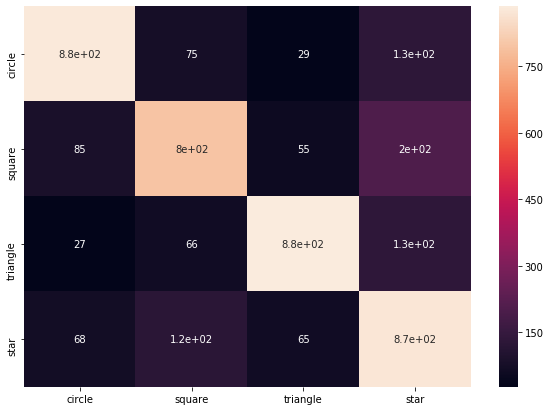

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.metrics import confusion_matrix
import seaborn as sn

modelRF = RandomForestClassifier()
modelRF.fit(x_train, y_train)

predictRF = modelRF.predict(x_test)
print('Random Forest Classifier : \n', classification_report(predictRF, y_test))
print('Random Forest Classifier Accuracy: ', accuracy_score(predictRF, y_test))

#confusion matrix, en el eje x van los reales y en el eje y los que predice el algoritmo
conf_matrix = confusion_matrix(y_test, predictRF)
conf_matrix = pd.DataFrame(conf_matrix,index = ['circle','square','triangle','star'])
conf_matrix.columns = ['circle','square','triangle','star']
plt.figure(figsize = (10,7))
sn.heatmap(conf_matrix, annot=True)

### Gradient Booster

C:\Users\Pedro Vallarino\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boost Classifier : 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79      1023
           1       0.70      0.75      0.73      1063
           2       0.76      0.88      0.82       963
           3       0.80      0.63      0.70      1442

    accuracy                           0.76      4491
   macro avg       0.76      0.77      0.76      4491
weighted avg       0.76      0.76      0.75      4491

Gradient Boost Classifier Accuracy:  0.7552883544867512


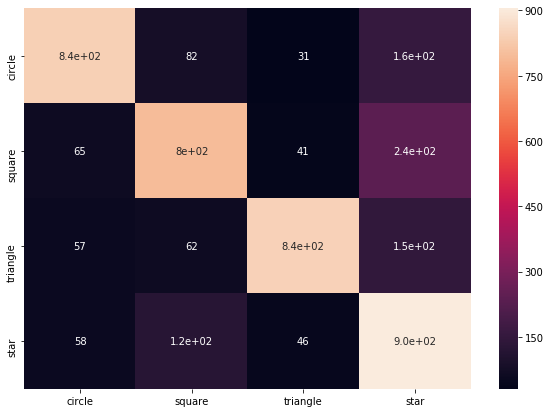

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.metrics import confusion_matrix
import seaborn as sn

modelGB = GradientBoostingClassifier()
modelGB.fit(x_train, y_train)

predictGB = modelGB.predict(x_test)
print('Gradient Boost Classifier : \n', classification_report(predictGB, y_test))
print('Gradient Boost Classifier Accuracy: ', accuracy_score(predictGB, y_test))

#confusion matrix, en el eje x van los reales y en el eje y los que predice el algoritmo
conf_matrix = confusion_matrix(y_test, predictGB)
conf_matrix = pd.DataFrame(conf_matrix,index = ['circle','square','triangle','star'])
conf_matrix.columns = ['circle','square','triangle','star']
plt.figure(figsize = (10,7))
sn.heatmap(conf_matrix, annot=True)

In [22]:
#Tratamiento de imagen que entra al sistema
import cv2
import numpy as np
import math

#Recibirla y mostrarla
imagen_prueba = cv2.imread(r'C:\Users\Pedro Vallarino\Desktop\Scripts\Python\Vision Artificial\Reconocer Formas\circulo200200.jpg')
cv2.imshow('ventana',imagen_prueba) 

#Pasarla a Binario (primero hay que pasarla a gris)
grayImage = cv2.cvtColor(imagen_prueba, cv2.COLOR_BGR2GRAY)
cv2.imshow('ventana 2',grayImage) 
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 125, 255, cv2.THRESH_BINARY)
cv2.imshow('ventana 3',blackAndWhiteImage) 
#cv2.waitKey(0)
#cv2.destroyAllWindows()


contours, hierarchy = cv2.findContours(blackAndWhiteImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# contours = [cnt1, cnt2, cnt3]
# print(contours)
cv2.drawContours(imagen_prueba, contours[1], -1, (0, 0, 255), 3)

cv2.imshow("Rayo", imagen_prueba)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Calculate Moments
moments = cv2.moments(contours[1])
# Calculate Hu Moments
HU = cv2.HuMoments(moments)

# Log scale hu moments
for num in range(0,7):
    HU[num] = -1 * math.copysign(1.0, HU[num]) * math.log10(abs(HU[num]))
    
HU = abs(HU)

In [31]:
display(x_test.head())
HU = pd.DataFrame(HU)
HU = HU.T
# HU.columns = ['Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','Hu7']
display(HU)

,Hu1,Hu2,Hu3,Hu4,Hu5,Hu6,Hu7
6440,0.778151,2.760422,21.033545,21.067643,42.118251,22.456814,44.220909
12053,0.676726,3.855766,4.568218,5.785557,10.983595,8.580245,11.478644
14446,0.681612,3.487443,5.170360,5.394013,10.967551,7.137797,10.741992
10784,0.719386,3.628489,2.378980,5.025225,9.058999,7.137591,8.780473
12596,0.671665,3.248604,5.272819,5.665204,11.286431,7.617391,11.283042


,0,1,2,3,4,5,6
0,0.798082,5.60354,6.15529,10.280266,21.046733,13.626323,18.498046


In [37]:
predictRF = modelRF.predict(HU)

if predictRF == 0:
    shape = 'Circulo'
    
if predictRF == 1:
    shape = 'Cuadrado'
    
if predictRF == 2:
    shape = 'Triangulo'
    
if predictRF == 3:
    shape = 'Estrella'
    
print('La forma es',shape)

La forma es Circulo
